In [1]:
import os
import glob
import pickle
import json
import pandas as pd
import numpy as np
import igraph as ig
from tqdm import tqdm
import seaborn as sns

In [2]:
!ls

Baseline              big_matrix.csv        prova.yago
Dev.ipynb             carbon.py             prova2.py
NewLoss.py            edo.pickle            tempi.py
__init__.py           example_dataset.ipynb
baseline.py           fix_dict.py


In [4]:
def create_df(file_names):
    rr = []

    for f in tqdm(file_names):
        with open(f, 'rb') as ff:
            d = pickle.load(ff)
    
        tmp = {}
        tmp['dataset'] = d['dataset']
        tmp['c_split'] = d['c_split']
        tmp['model'] = d['model']
        tmp['property'] = d['property']
        tmp['value'] = d['value']
        
        tmp['results_hits_at_10'] = d['results']['both']['realistic']['hits_at_10']
        tmp['results_hits_at_5'] = d['results']['both']['realistic']['hits_at_5']
        tmp['results_hits_at_3'] = d['results']['both']['realistic']['hits_at_3']
        tmp['results_hits_at_1'] = d['results']['both']['realistic']['hits_at_1']
        tmp['results_inverse_harmonic_mean_rank'] = d['results']['both']['realistic']['inverse_harmonic_mean_rank']
        tmp['results_arithmetic_mean_rank'] = d['results']['both']['realistic']['arithmetic_mean_rank']
    
        tmp['results_min_hits_at_10'] = d['results_min']['both']['realistic']['hits_at_10']
        tmp['results_min_hits_at_5'] = d['results_min']['both']['realistic']['hits_at_5']
        tmp['results_min_hits_at_3'] = d['results_min']['both']['realistic']['hits_at_3']
        tmp['results_min_hits_at_1'] = d['results_min']['both']['realistic']['hits_at_1']
        tmp['results_arithmetic_mean_rank'] = d['results_min']['both']['realistic']['arithmetic_mean_rank']
    
        tmp['training_gpu_power'] = d['trackers']['training_tracker']['gpu_power']
        tmp['training_duration'] = d['trackers']['training_tracker']['duration']
    
        tmp['prediction_gpu_power'] = d['trackers']['prediction_tracker']['gpu_power']
        tmp['prediction_duration'] = d['trackers']['prediction_tracker']['duration']
    
    
        tmp['property'] = d['property']
        tmp['value'] = d['value']
    
        tmp = {**tmp, **d['graph_metrics']}
        
        rr.append(tmp)

    return pd.DataFrame(rr)
    

In [5]:
fnames = glob.glob("../Training/DONE/**/*.pickle")

df = create_df(fnames)



100%|██████████| 495/495 [03:03<00:00,  2.70it/s]


In [6]:
fnames_transe = glob.glob("../Training/DONE/*TransE*/*.pickle")
fnames_complex = glob.glob("../Training/DONE/*ComplEx*/*.pickle")

res = fnames_transe + fnames_complex








In [7]:
for f in tqdm(res):
    with open(f, 'rb') as ff:
        d = pickle.load(ff)

['../Training/DONE/WN18_1_TransE_degree_0.01/instance.pickle',
 '../Training/DONE/WN18_0_TransE_pagerank_0.1/instance.pickle',
 '../Training/DONE/FB15k_1_TransE_pagerank_0.05/instance.pickle',
 '../Training/DONE/WN18RR_2_TransE_degree_-0.15/instance.pickle',
 '../Training/DONE/WN18RR_2_TransE_pagerank_-0.1/instance.pickle',
 '../Training/DONE/FB15k237_0_TransE_betweenness_-0.1/instance.pickle',
 '../Training/DONE/FB15k237_2_TransE_harmonic_centrality_0.01/instance.pickle',
 '../Training/DONE/WN18RR_2_TransE_harmonic_centrality_0.1/instance.pickle',
 '../Training/DONE/WN18RR_0_TransE_pagerank_0.03/instance.pickle',
 '../Training/DONE/FB15k237_0_TransE_harmonic_centrality_-0.2/instance.pickle',
 '../Training/DONE/FB15k237_1_TransE_betweenness_0.05/instance.pickle',
 '../Training/DONE/YAGO310_2_TransE_degree_-0.15/instance.pickle',
 '../Training/DONE/FB15k_1_TransE_harmonic_centrality_-0.1/instance.pickle',
 '../Training/DONE/WN18RR_0_TransE_pagerank_-0.15/instance.pickle',
 '../Training/

In [26]:
fnames = glob.glob("../Training/DONE/*TransE*/*.pickle")

<Axes: >

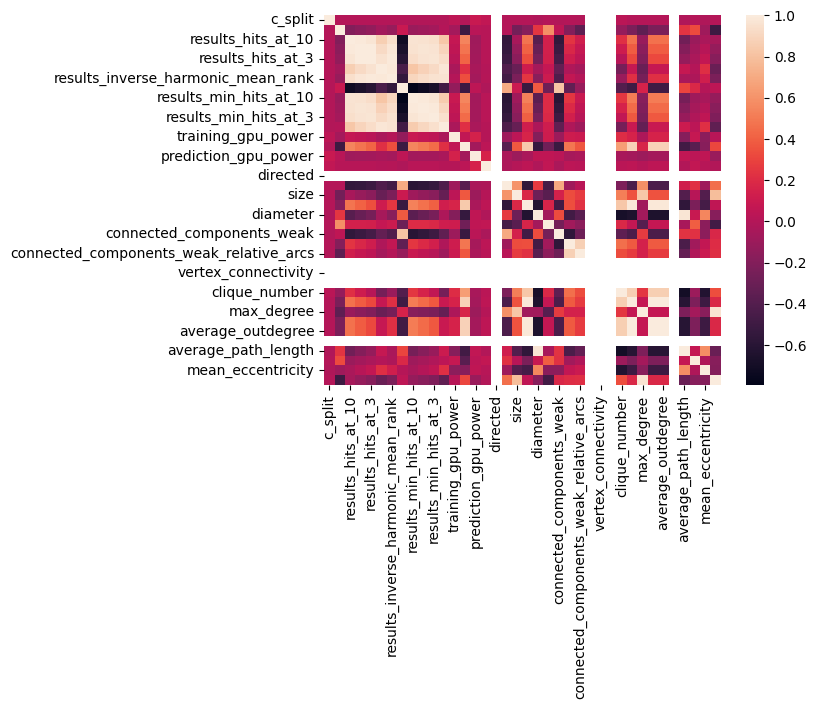

In [32]:
sns.heatmap(df.corr(numeric_only=True))

In [152]:
# sum over all trackers

duration = 0.
cpu_energy = 0.
gpu_energy = 0.
ram_energy = 0.

keys = ['duration', 'cpu_energy', 'gpu_energy', 'ram_energy']

for k_, t in d['trackers'].items():
    for k in keys:
        exec(k + " += t['" + k + "']")

In [153]:
d['duration'] = duration
d['cpu_energy'] = cpu_energy
d['gpu_energy'] = gpu_energy
d['ram_energy'] = ram_energy
del d['trackers']

In [154]:
d['duration']

4414.737663984299

In [109]:
d.keys()

dict_keys(['dataset', 'c_split', 'model', 'property', 'value', 'results', 'results_min', 'order', 'size', 'density', 'diameter', 'duration', 'cpu_energy', 'gpu_energy', 'ram_energy'])

In [111]:
metrics = ['hits_at_1', 'hits_at_1', 'hits_at_1', 'inverse_harmonic_mean_rank', 'adjusted_inverse_harmonic_mean_rank']

for m in metrics:
    d[m] = d['results']['both']['realistic'][m]
    d[m + '_min'] = d['results_min']['both']['realistic'][m]
    
del d['results']
del d['results_min']

In [117]:
pd.DataFrame.from_dict(tuples)

,dataset,c_split,model,property,value,order,size,density,diameter,duration,cpu_energy,gpu_energy,ram_energy,hits_at_1,hits_at_1_min,inverse_harmonic_mean_rank,inverse_harmonic_mean_rank_min,adjusted_inverse_harmonic_mean_rank,adjusted_inverse_harmonic_mean_rank_min
0,YAGO310,0,ComplEx,betweenness,-0.05,"(123143,)","(674517,)",0.000044,38,4414.737664,0.137961,0.285912,0.001507,0.006353,0.008619,0.010211,0.013219,0.010112,0.01312
1,YAGO310,0,ComplEx,betweenness,-0.05,"(123143,)","(674517,)",0.000044,38,4414.737664,0.137961,0.285912,0.001507,0.006353,0.008619,0.010211,0.013219,0.010112,0.01312


In [120]:
!ls test_pickle_dgx/tmp/*/*.pickle | wc -l

      66


In [143]:
%%time

fnames = glob.glob("test_pickle_dgx/tmp/*/*.pickle")

tuples = []

for f in fnames:
    print(f)
    with open(f, 'rb') as ff:
        
        d = pickle.load(ff)
        
        
        directed = True

        df = pd.DataFrame(d['training'], columns=['h', 'r', 't'])
        df_no_rel = df[['h', 't']]
        df_no_rel = df_no_rel.drop_duplicates()
        kg = ig.Graph.DataFrame(df_no_rel, directed=directed)
        
        del d['relation_to_id']
        del d['entity_to_id']
        del d['training']
        del d['validation']
        del d['testing']
        del d['min_testing']
        del d['HP']
        del d['SETTINGS']
        
        # Graph measures
        d['order'] = len(kg.vs)
        d['size'] = kg.ecount()
        d['density'] = kg.density()
        d['diameter'] = kg.diameter(directed=directed)
        
        # Energy measures

        duration = 0.
        cpu_energy = 0.
        gpu_energy = 0.
        ram_energy = 0.

        keys = ['duration', 'cpu_energy', 'gpu_energy', 'ram_energy']

        for k_, t in d['trackers'].items():
            for k in keys:
                exec(k + " += t['" + k + "']")
        d['duration'] = duration
        d['cpu_energy'] = cpu_energy
        d['gpu_energy'] = gpu_energy
        d['ram_energy'] = ram_energy
        del d['trackers']
        
        metrics = ['hits_at_1', 'hits_at_1', 'hits_at_1', 'inverse_harmonic_mean_rank', 'adjusted_inverse_harmonic_mean_rank']

        for m in metrics:
            d[m] = d['results']['both']['realistic'][m]
            d[m + '_min'] = d['results_min']['both']['realistic'][m]

        del d['results']
        del d['results_min']
        
        tuples.append(d)

res = pd.DataFrame.from_dict(tuples)

test_pickle_dgx/tmp/YAGO310_0_ComplEx_betweenness_-0.05/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_ComplEx_betweenness_-0.1/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_TransE_degree_-0.15/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_ComplEx_pagerank_-0.1/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_ComplEx_pagerank_-0.05/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_TransE_degree_-0.2/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_TransE_degree_0.05/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_ComplEx_pagerank_0.01/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_TransE_harmonic_centrality_0.1/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_TransE_pagerank_0.1/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_TransE_degree_0.03/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_ComplEx_degree_0.1/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_ComplEx_betweenness_0.01/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_TransE_betweenness_-0.05/instance.pickle
test_pickle_dgx/tmp/YAGO310_0_ComplEx_deg

In [144]:
res = pd.DataFrame.from_dict(tuples)

In [145]:
oldcols = res.columns

In [146]:
res = res[['dataset', 'c_split', 'model', 'property', 'value', 'duration',
       'cpu_energy', 'gpu_energy', 'ram_energy', 'size', 'order', 'density', 'diameter',
       'hits_at_1',
       'inverse_harmonic_mean_rank',
       'adjusted_inverse_harmonic_mean_rank',
       'hits_at_1_min', 
       'inverse_harmonic_mean_rank_min',
       'adjusted_inverse_harmonic_mean_rank_min']]

In [147]:
len(res.columns) == len(oldcols)

True

In [148]:
res

,dataset,c_split,model,property,value,duration,cpu_energy,gpu_energy,ram_energy,size,order,density,diameter,hits_at_1,inverse_harmonic_mean_rank,adjusted_inverse_harmonic_mean_rank,hits_at_1_min,inverse_harmonic_mean_rank_min,adjusted_inverse_harmonic_mean_rank_min
0,YAGO310,0,ComplEx,betweenness,-0.05,4414.737664,0.137961,0.285912,0.001507,674517,123143,0.000044,38,0.006353,0.010211,0.010112,0.008619,0.013219,0.013120
1,YAGO310,0,ComplEx,betweenness,-0.10,4416.962379,0.138030,0.275597,0.001512,673780,123143,0.000044,38,0.006400,0.010252,0.010153,0.009000,0.013901,0.013803
2,YAGO310,0,TransE,degree,-0.15,14891.086717,0.465347,0.803357,0.003488,643970,123143,0.000042,38,0.000000,0.177579,0.177497,0.000000,0.124834,0.124747
3,YAGO310,0,ComplEx,pagerank,-0.10,4280.172200,0.133756,0.250922,0.001451,673416,123143,0.000044,38,0.006306,0.010050,0.009951,0.012701,0.018400,0.018302
4,YAGO310,0,ComplEx,pagerank,-0.05,4366.557531,0.136455,0.262749,0.001469,686429,123143,0.000045,38,0.006304,0.010084,0.009985,0.011873,0.017406,0.017308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,YAGO310,0,ComplEx,betweenness,0.10,1824.652725,0.057021,0.117435,0.000589,250356,123143,0.000017,41,0.015038,0.024695,0.024597,0.013007,0.022090,0.021992
62,YAGO310,0,TransE,degree,0.10,2674.539377,0.083584,0.125580,0.000569,108127,123143,0.000007,36,0.000000,0.127465,0.127378,0.000000,0.128210,0.128123
63,YAGO310,0,TransE,pagerank,0.03,4947.006873,0.154594,0.250050,0.001077,215362,123143,0.000014,44,0.000000,0.150624,0.150540,0.000000,0.153044,0.152959
64,YAGO310,0,ComplEx,betweenness,-0.15,4245.050111,0.132658,0.250359,0.001447,646724,123143,0.000043,38,0.006157,0.009765,0.009665,0.008902,0.013613,0.013514


In [149]:
res.to_csv("res.csv", index=None)

In [150]:
!head res.csv

dataset,c_split,model,property,value,duration,cpu_energy,gpu_energy,ram_energy,size,order,density,diameter,hits_at_1,inverse_harmonic_mean_rank,adjusted_inverse_harmonic_mean_rank,hits_at_1_min,inverse_harmonic_mean_rank_min,adjusted_inverse_harmonic_mean_rank_min
YAGO310,0,ComplEx,betweenness,-0.05,4414.737663984299,0.13796100084483626,0.2859123937297312,0.0015069565493628075,674517,123143,4.4481248370819716e-05,38,0.006352656778509655,0.010211220011115074,0.010111626475159936,0.008619473520864486,0.01321898028254509,0.013120396767628507
YAGO310,0,ComplEx,betweenness,-0.1,4416.962379455566,0.13803043419122699,0.2755968010328189,0.0015118625210291956,673780,123143,4.44326466601893e-05,38,0.006400097525295623,0.01025240309536457,0.010152814038321332,0.00900036678610727,0.013901238329708576,0.013802722976724111
YAGO310,0,TransE,degree,-0.15,14891.086717128754,0.46534704122692355,0.8033568137957445,0.0034880964154687583,643970,123143,4.2466816274989025e-05,38,0.0,0.17757926881313324,0.177